In [34]:
import os
cwd = os.getcwd()
assert os.path.join(
    os.path.basename(os.path.dirname(cwd)),
    os.path.basename(cwd)) == 'chromatic-encoding/viz', cwd

In [35]:
S3ROOT="s3://sisu-datasets/ce-0"
for encoding in ['ce', 'ft']:
    for i in [512, 1024, 4096]:
        fname = f"url.{encoding}.{i}.wd.tar"
        
        ! cd data && aws s3 cp {S3ROOT}/nn/{fname} .
        ! tar xf data/{fname} -C data
        
        to_rm = ' '.join(
            'data/' + fname[:-len('tar')] + suffix
            for suffix in ['tar', 'log', 'pdf']
        )
        
        ! rm {to_rm}

download: s3://sisu-datasets/ce-0/nn/url.ce.512.wd.tar to ./url.ce.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.1024.wd.tar to ./url.ce.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.4096.wd.tar to ./url.ce.4096.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.512.wd.tar to ./url.ft.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.1024.wd.tar to ./url.ft.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.4096.wd.tar to ./url.ft.4096.wd.tar


In [36]:
import json, glob
df = [json.load(open(f)) for f in glob.glob('data/*.json')]
import pandas as pd
df = pd.DataFrame.from_records(df)
df['memory_gb'] = df['allocated_bytes.all.peak'] / 1024 / 1024 / 1024 # GB
df

,active_bytes.all.peak,allocated_bytes.all.peak,dataset,device,encoding,inactive_split_bytes.all.peak,modelname,num_params,num_test,num_train,...,test_epoch_logloss,test_logloss,train_acc,train_acc_best_const,train_auc,train_epoch_logloss,train_logloss,train_sec,truncate,memory_gb
0,22683648,22683648,url,cuda,ft,23081472,wd,140096,718839,1677291,...,"[0.06846864271871513, 0.05803266409865148, 0.0...",0.044554,0.985621,0.673549,0.998554,"[0.14341530556871127, 0.06830629023016639, 0.0...",0.042993,1716.844947,512,0.021126
1,181225472,181225472,url,cuda,ft,73251328,wd,1118528,718839,1677291,...,"[0.05600828588401643, 0.047005196271124094, 0....",0.038660,0.993137,0.673549,0.999683,"[0.13364919213774992, 0.0547435983453075, 0.04...",0.021376,2885.836650,4096,0.168779
2,744359936,744359936,url,cuda,ce,90327552,wd,48046263,718839,1677291,...,"[0.06253934217364537, 0.05801717567172972, 0.0...",0.039819,0.997585,0.673549,0.999953,"[0.11016532656746429, 0.05077670805765913, 0.0...",0.008109,2951.647770,4096,0.693239
3,586549248,586549248,url,cuda,ce,33597952,wd,47128759,718839,1677291,...,"[0.07957436478720979, 0.06654896633183625, 0.0...",0.038270,0.997631,0.673549,0.999948,"[0.11081797201253808, 0.05681671211852814, 0.0...",0.009558,1744.520097,512,0.546267
4,45332480,45332480,url,cuda,ft,40311296,wd,279872,718839,1677291,...,"[0.06773350008801715, 0.05565949315742956, 0.0...",0.045442,0.988183,0.673549,0.999013,"[0.10839375437186942, 0.058689345063392684, 0....",0.034867,1864.638899,1024,0.042219
5,609093632,609093632,url,cuda,ce,43151360,wd,47259831,718839,1677291,...,"[0.06625194607330616, 0.05298917275167823, 0.0...",0.036841,0.997209,0.673549,0.999957,"[0.10803880433208216, 0.05298504829132315, 0.0...",0.009840,2087.517822,1024,0.567263


In [37]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

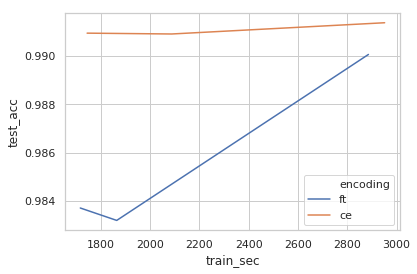

In [41]:
# x = 
g = sns.lineplot(data=df, x='train_sec', y='test_acc', hue='encoding')

#handles, labels = g.get_legend_handles_labels()
#g.legend(handles[1:], labels[1:], loc='center left', bbox_to_anchor=(1.05, 0.5))
g.legend()
#plt.savefig('out/frontier.pdf',  bbox_inches='tight')

plt.show()

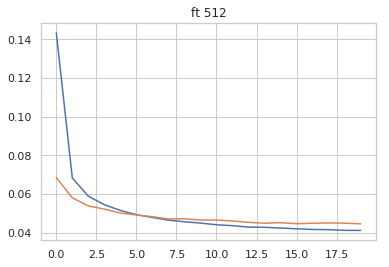

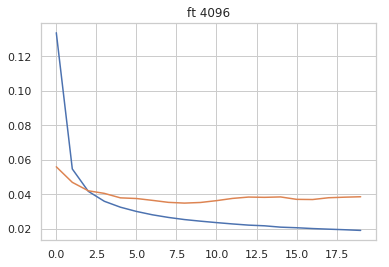

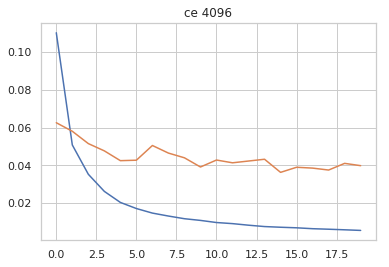

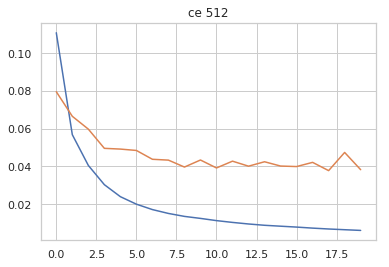

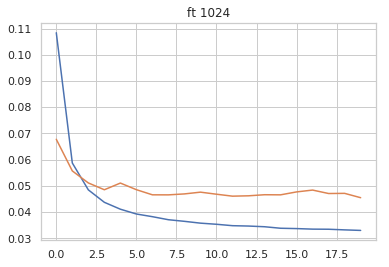

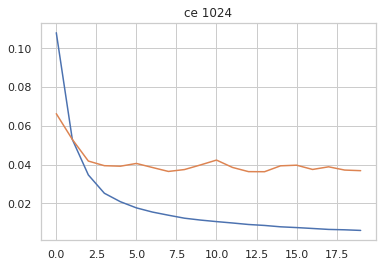

In [45]:
for row in df.itertuples():
    print(row.)
    plt.plot(row.train_epoch_logloss, label='train')
    plt.plot(row.test_epoch_logloss, label='test')
    plt.title(row.encoding + ' ' + str(row.truncate))
    plt.show()